# Karate Club Community Detection

In [1]:
from pandas import Series, DataFrame
import pandas as pd
import networkx as nx
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import community
import igraph
from networkx.algorithms.community import centrality
import itertools

In [2]:
# create graph
club = r'./zachary_karate_club.txt'
G = nx.read_edgelist(club, nodetype = str)

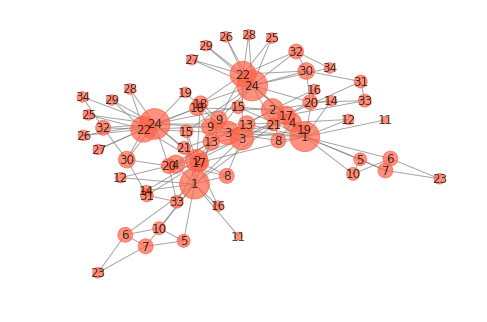

In [4]:
# rough idea of the network
labels_dict = dict()
for i in list(G.nodes()):
    labels_dict[i] = str(int(i)+1)
# Spring layout
nx.draw(G, 
        pos = nx.spring_layout(G, k = 0.25),
        node_size = list(55 * i for i in dict(nx.degree(G, G.nodes())).values()),
        node_color = 'tomato',
        edge_color = 'grey',
        alpha = 0.7,
        with_labels = True,
        labels = labels_dict)
plt.show()

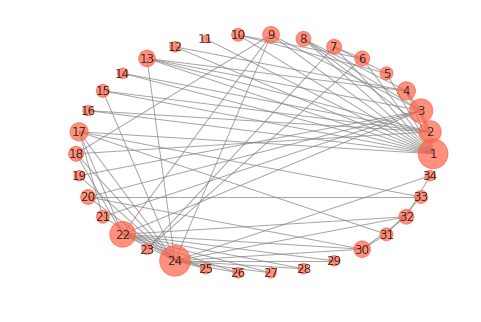

In [6]:
# Shell layout
nx.draw(G, 
        pos = nx.shell_layout(G),
        node_size = list(55 * i for i in dict(nx.degree(G, G.nodes())).values()),
        node_color = 'tomato',
        edge_color = 'grey',
        alpha = 0.7,
        with_labels = True,
        labels = labels_dict)
plt.show()

In [5]:
# Find a partition that maximizes modularity
part = community.best_partition(G)
mod = community.modularity(part, G)
print("Louvain - modularity: ", mod)


# dendrogram - partition at certain level
den = community.generate_dendrogram(G)
for level in range(len(den)):
   print("partition at level", level, " is ", community.partition_at_level(den, level), "\n")
print("The least partition gives 4 communities, and the second least gives 7 communities.")

AttributeError: module 'community' has no attribute 'best_partition'

Instructor group:
Correctly classified nodes are 1, 2, 4, 5, 6, 7, 8, 11, 12, 13, 14; nodes that are wrongly included by the algorithm are 10, 15, 16, 23; nodes that belong to the instructor group but are missed are 3, 9, 17, 18, 20, 22. The accuracy is around 64.71%.

Owner group:
Correctly classified nodes are 19, 21, 24, 25, 26, 27, 28, 29, 30, 31; nodes that are wrongly included by the algorithm are 3, 9, 17, 18, 20, 22; nodes that belong to the owner group but are missed are 10, 15, 16, 19, 23, 32. The accurancy is around 58.82%.

In [ ]:
# 2. Plot using networkx where different community households have different colors.  
# for 1.(2)
# level 0
lv0_dict = community.partition_at_level(den, 0)
lv0_part_dict = dict()
for i in list(set(lv0_dict.values())):
    lv0_part_dict[i] = list()
    for j in list(lv0_dict.keys()):
        if lv0_dict[j] == i:
            lv0_part_dict[i].append(j)
for i in list(lv0_part_dict.keys()):
    print("The " + str(int(i)+1) + "th community contains " + str(len(lv0_part_dict[i])) + " nodes: " + str(lv0_part_dict[i]) + ". \n")

In [ ]:
values = [lv0_dict[node] for node in G.nodes()]
pos = nx.spring_layout(G)
nx.draw(G, 
        pos, 
        cmap = plt.get_cmap('jet'), 
        node_color = values, 
        node_size = 300, 
        alpha = 0.6,
        edge_color = 'lightgray',
        with_labels = True)
plt.title('Karate Club Community - Louvain Partition lv0')
plt.savefig('Karate Club Community_Louvain lv0')
plt.show()

There are too many splits (7 in total) in this level which makes it hard to compare. Thus we use level 1's split (4 in total) to draw the graph and compare with the community split in the real life.

In [ ]:
# level 1
lv1_dict = community.partition_at_level(den, 1)
lv1_part_dict = dict()
for i in list(set(lv1_dict.values())):
    lv1_part_dict[i] = list()
    for j in list(lv1_dict.keys()):
        if lv1_dict[j] == i:
            lv1_part_dict[i].append(j)

for i in list(lv1_part_dict.keys()):
    print("The " + str(int(i)+1) + "th community contains " + str(len(lv1_part_dict[i])) + " nodes: " + str(lv1_part_dict[i]) + ". \n")

In [ ]:
values = [lv1_dict[node] for node in G.nodes()]
pos = nx.spring_layout(G)
nx.draw(G, 
        pos, 
        cmap = plt.get_cmap('jet'), 
        node_color = values, 
        node_size = 300, 
        alpha = 0.6,
        edge_color = 'lightgray',
        with_labels = True)
plt.title('Karate Club Community - Louvain Partition lv1')
plt.savefig('Karate Club Community_Louvain lv1')
plt.show()